# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [2]:
# you are free to use any package you deem fit
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Dataset

In [6]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

# EDA

In [11]:
X

array([[ 1.56940371e+00, -1.33388081e-01],
       [ 4.96306632e-01,  4.43234515e-01],
       [ 1.78323962e+00, -2.30246868e-01],
       [ 5.51057534e-01, -3.74929710e-02],
       [ 2.57809347e-01,  5.83334122e-01],
       [ 1.79879749e+00, -2.38083539e-01],
       [ 1.76883334e+00,  3.03975384e-02],
       [ 2.56430663e-01,  2.70217668e-01],
       [-1.59323292e-01,  1.57368047e-01],
       [ 1.80554220e+00, -1.53014783e-01],
       [ 8.65663000e-01,  4.38028555e-01],
       [ 7.73617833e-01, -6.68331613e-01],
       [ 2.18438549e+00, -3.51050363e-01],
       [-2.81394269e-01,  5.81812587e-02],
       [ 2.11287154e+00, -2.90604784e-01],
       [ 1.84562295e+00, -2.46868336e-01],
       [ 1.97708872e+00,  3.45546178e-01],
       [-3.32679065e-01,  1.06211840e+00],
       [ 1.70588306e+00, -9.26755249e-01],
       [ 2.20675843e+00,  3.74329528e-02],
       [ 1.90607724e+00,  3.00138949e-01],
       [ 2.25935272e+00,  5.01298935e-01],
       [ 6.54956983e-01, -4.08492229e-01],
       [ 1.

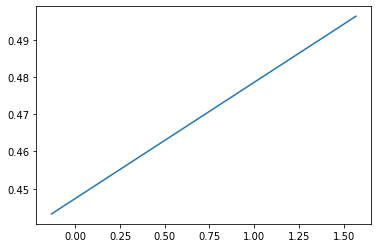

In [9]:
plt.plot(X[0], X[1])

## Training

## Testing / Optimization

## Performance Analysis